# 対応,写像

In [1]:
import functions
from functions import (Set, Map)
from functions.operand import *

In [2]:
from functools import reduce
from collections import defaultdict

A = Set({_ for _ in range(11)})
B = Set({_ for _ in range(13)})

def count_relations(A_B):  
    count = defaultdict(int)
    for i in A_B.values:
        count[i[0]] += 1
    return reduce(lambda x,y: x*y, count.values())

A_B = A*B
print('元の数: ', len(A_B), len(A) * len(B))
print('写像の総数: ', count_relations(A_B), len(B)**len(A))

元の数:  143 143
写像の総数:  1792160394037 1792160394037


In [3]:
elector = Set({_ for _ in range(10)})  # 10人の選挙人
candidate = Set({'A', 'B', 'C'})  # ３人の候補者

def gamma(x):  # 対応の規則（本来は一対一対応出なくても良い）
    '''gamma: elector -> candidate'''
    if x%2 == 0:
        return {'A'}
    elif x%3 == 0:
        return {'B'}
    else:
        return {}

g = Map(gamma, A=elector, B=candidate)

rlt = g.relations()
_, rlt_image = g.image()

print('対応: ', rlt)
print('像: ', rlt_image.values)
print('像が終集合の部分集合: ', rlt_image in candidate)

対応:  {0: {'A'}, 1: {}, 2: {'A'}, 3: {'B'}, 4: {'A'}, 5: {}, 6: {'A'}, 7: {}, 8: {'A'}, 9: {'B'}}
像:  {'A', 'B'}
像が終集合の部分集合:  True


In [4]:
dmn, img = g.image()
print(f'定義域: {dmn.values}\n値域: {img.values}')
print('定義域が始集合の部分集合: ', dmn in elector)

定義域: {0, 2, 3, 4, 6, 8, 9}
値域: {'A', 'B'}
定義域が始集合の部分集合:  True


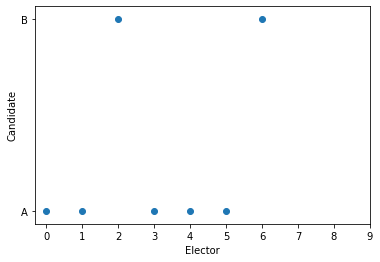

In [5]:
# グラフ
import matplotlib.pyplot as plt
import copy
%matplotlib inline

def graph(rlt, A, inv=False, xlabel='Elector', ylabel='Candidate'):
    rlt_ = copy.copy(rlt)
    A_img = np.array([[e, *rlt_[e]] for e in A if len(rlt_[e]) > 0])
    plt.scatter(A_img[:,0],A_img[:,1])
    plt.xticks(list(A),list(A))
    if inv:
        xlabel, ylabel = ylabel, xlabel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return sorted(rlt.items())

rlt_graph = graph(rlt, elector.values)

In [6]:
import numpy as np

rlts = elector * candidate  # 一対一対応に絞っています...
rlt = Set(set([]))
for e in elector.values:
    for i in rlts.values:
        if i[0] == e:
            rlt = rlt | Set({i})
            break
print(rlt.values)

{(2, 'A'), (5, 'C'), (4, 'A'), (7, 'A'), (0, 'C'), (1, 'A'), (3, 'A'), (9, 'B'), (8, 'C'), (6, 'C')}


{0: {'B'}, 1: {'B'}, 2: {'B'}, 3: {'B'}, 4: {'B'}, 5: {'B'}, 6: {'B'}, 7: {'B'}, 8: {'B'}, 9: {'B'}}


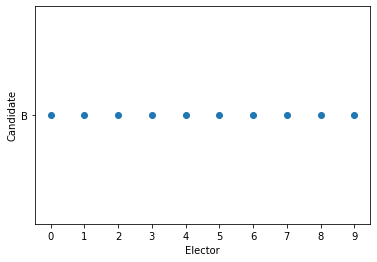

{'B'}


In [7]:
def gamma(x):  # グラフと合うように対応を決める
    return {'B'}

g_b = Map(gamma, A=elector, B=candidate)

rlt = g_b.relations()
print(rlt)

rlt_graph = graph(rlt, elector.values)
print(g_b.image()[1].values)

In [8]:
dmn, img = g_b.image()
print(f'定義域: {dmn.values}\n値域: {img.values}')

定義域: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
値域: {'B'}


### 逆対応

{'C': set(), 'A': set(), 'B': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}}


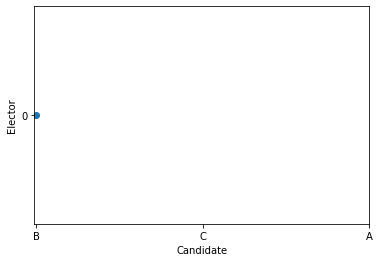

[('A', set()), ('B', {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}), ('C', set())]

In [9]:
inv_rlt = g_b.inv().relations()
print(inv_rlt)
graph(inv_rlt, candidate.values, inv=True)

In [10]:
dmn,img = g_b.image()
dmn_inv,img_inv = g_b.inv().image()
print(dmn_inv == img)
print(img_inv == dmn)

False
True


### 写像

$A \times B$ の部分集合 $G$ が $f: A \rightarrow B$ のグラフになる.
$\Leftrightarrow$
$\forall a\ \exists! b\ [(a,b) \in G]$

In [11]:
def is_map(rlt):  # 対応が写像かどうか
    return all([len(b) == 1 for a,b in rlt.items()])

In [12]:
print(is_map(rlt))
print(is_map(inv_rlt))

True
False


True
False


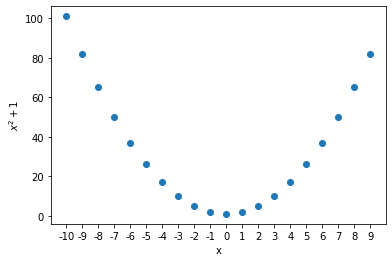

In [13]:
# x^2+1

D = Set({a for a in range(-10,10)})

class Quadra(Map):
    def __init__(self, A=D, B=Set(set([])), types='func', init=True):
        self.types = types
        self.values = self.func
        self.A = A
        self.B = B
        self.target_init()

    def func(self, x):
        return {x**2 + 1}

print(is_map(Quadra().relations()))
print(is_map(Quadra().inv().relations()))
rlt_graph = graph(Quadra().relations(), D.values ,xlabel='x', ylabel='$x^{2}+1$')

True
False


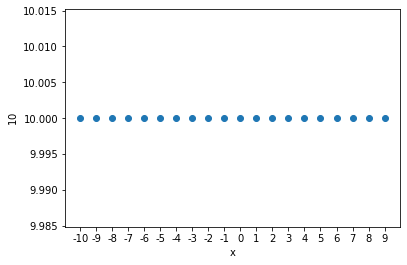

In [14]:
# 定値写像

D = Set({a for a in range(-10,10)})

class Const(Map):
    def __init__(self, A=D, B=Set(set([])), types='func', init=True):
        self.types = types
        self.values = self.func
        self.A = A
        self.B = B
        self.target_init()

    def func(self, x):
        return {10}

print(is_map(Const().relations()))
print(is_map(Const().inv().relations()))
rlt_graph = graph(Const().relations(), D.values ,xlabel='x', ylabel='$10$')

True
True


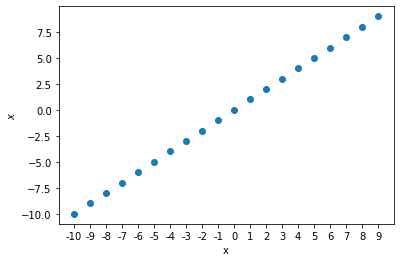

In [15]:
# 恒等写像

D = Set({a for a in range(-10,10)})

class Identity(Map):
    def __init__(self, A=D, B=Set(set([])), types='func', init=True):
        self.types = types
        self.values = self.func
        self.A = A
        self.B = B
        self.target_init()

    def func(self, x):
        return {x}

print(is_map(Identity().relations()))
print(is_map(Identity().inv().relations()))
rlt_graph = graph(Identity().relations(), D.values ,xlabel='x', ylabel='$x$')